In [1]:
# first tensor flow program
# intend to build understanding of neural nets to DQN to implement for stat arb
# Start with MNIST data set

In [2]:
# import packages
import tensorflow as tf
from tensorflow import keras

# other libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.4.1


In [3]:
# import data set
fashion_mnist = keras.datasets.fashion_mnist

# dataset returns train and test images and labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# classification labels not included with data set so must define
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
# find shape of training data 
# should show 60,000 images where each image is 28x28 px
train_images.shape

(60000, 28, 28)

In [6]:
# number of labels should match number of images
len(train_labels)

60000

In [7]:
# first value is 9 therfore first image should be an ankle boot
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# find shape of test data
# should show 10,000 images where each image is 28x28 px
test_images.shape

(10000, 28, 28)

In [9]:
# number of labels should match number of images
len(test_labels)

10000

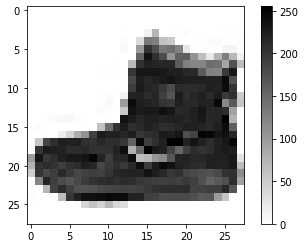

In [10]:
# lets print first element from data set to see an example
plt.figure()
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.gca().grid(False)

In [11]:
# when classifying images, neural networks prefer normalised data with values between 0 and 1
# given pixel values have values 0 to 255, we will normalize to get vales between 0 and 1

train_images = train_images / 255.0

test_images = test_images / 255.0

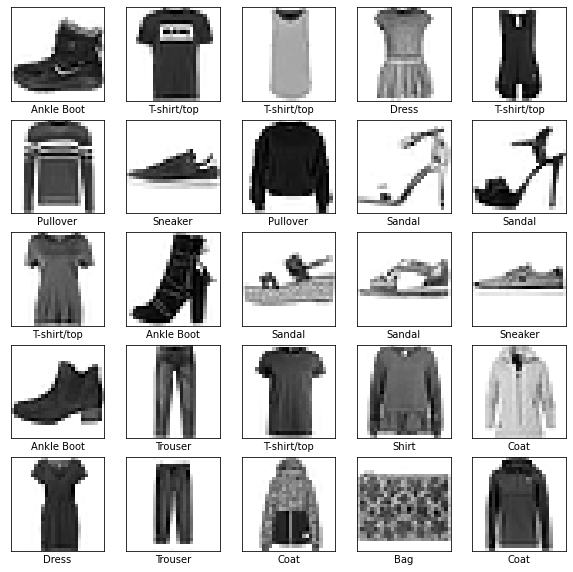

In [12]:
# Lets display the first 25 images to check the labels are correct and to verify the format

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [13]:
# Three steps to Keras:
# 1: define model architecure 
# 2: compile model
# 3: train model

In [14]:
# 1. Defining architecture: Building the model
# define neural network using keras sequential api
# sequential means a stack of layers. Good for one input / output. Here our input is an image and output is a label
# first, define model as sequential

model = keras.Sequential([
    # Pre-process data by flattening images from 2D shapes to vectors
    # here we loose some information in terms of pixels 2D relationship to each other but it doesnt matter that much
    keras.layers.Flatten(input_shape=(28, 28)),
    # first neural network layer
    # more layers added = more patterns network is capable of learning. Large network can learn more complex data set
    # but when training a network there is a tension between memorization and generalization
    # many layers might lead to overfitting, i.e. using capacity to memorize data and not nescisarily predict new data well
    # small networks more likely to learn patterns that generalzie becasue they have less memory to work with so 
    # they have to focus on patterns
    # 128 is number of neurons. Each neuron is computing features of the input
    # we choose number of neurons based on tests and tweaks over time. given this old data set we know empirically 128 is a
    # good starting point
    # all interior layers can end with relu
    # to convert model to a deep neural network, we simply copy and past the line below, thus adding a layer.
    keras.layers.Dense(128, activation = tf.nn.relu),
    # with MNIST we have multi class classification. 1 input, 10 possible outputs
    # output layer should be soft max, i.e. output a probability distribution over all the classes that an image could be 
    # classified as
    # Last layer is a probability distribution 
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [15]:
# 2. Compile model
# networks are trained through back propigation and gradient descent
# optimizer carries out these tasks
# diff optimizers with diff strategies, but for getting started Adam works
##### this is an old format that exists in v1 therfore adding compat.v1. to optimizer
model.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
              # next we need a loss function. Agian many different ones, over time we will learn which 
              # is the correct one for our problem. Here, we have labels 0-9. When network makes prediction,
              # in our output prob. dist. we want very low values for 9/10 categories and high value for 1/10
              # indicating a confident prediction. our perfect output layer is 9 zeroes and 1 one. I.e. perfect prediction
              # our loss is the error between expected value and actual value. So the loss function tries to adjust
              # weights across model to reduce this loss. Sparse categorical crossentropy will give a number representing how bad 
              # a job we did for predicting the desired output
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )


In [16]:
# 3. Train model
# now we feed training data to model 
# the model learns to associate images and lables
# we ask the model to make predictions about the test set 
# epochs has to be set propperly for every individual problem we work on. No way to know this in advance
# An epoch is one sweep over an entire training set where we train the model as we go over the data
# i.e. how long we should train the network. 
# Too short: bad job at classifying data. Wont know enough patterns.
# Too long: Learn overly specific patterns and memorize data thus performing badly on test set. 
# balance to be found here
# to start training:

model.fit(train_images, train_labels, epochs = 5)

# Lower numbers for loss are better
# higher numbers for accuracy are better

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6320 - accuracy: 0.7815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3818 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3316 - accuracy: 0.8795
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3090 - accuracy: 0.8875
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2906 - accuracy: 0.8942


In [17]:
# evaluate accuracy of model
# if number is similar to train, it tells us we have a reasonable size for the number of epochs
# if test set number was way lower, it would indiacte an overfit, training model for too long
# if both low, we havent trained the model long enough. 

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8763
Test Accuracy:  0.8762999773025513


In [18]:
# now that the model is trained, we can use it to make predicitons about the test images
# lets look at the predicted label for the first image of the test set
# this shows us the probability distribution over all possible labels for first image of test set

predictions = model.predict(test_images)

predictions[0]

array([1.3283629e-06, 6.4351201e-07, 1.5023635e-07, 9.5972109e-07,
       5.7188112e-07, 6.0250177e-03, 2.5749381e-05, 3.3906583e-02,
       2.0091638e-05, 9.6001881e-01], dtype=float32)

In [19]:
# to find the actual prediction of the label for the image:
# np.argmax returns the index of max values along an axis
# this shows us that the predicted label for the first item in the test set in ankle boot

np.argmax(predictions[0])

9

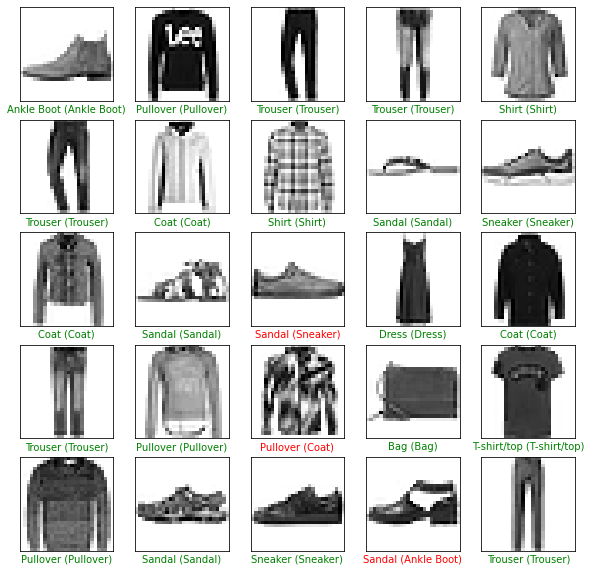

In [20]:
# lets plot the first 25 images of the test set, and colour their correctly predicted labels green, and vice versa red

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]), 
                                color = color)